<a href="https://colab.research.google.com/github/BrokenShell/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 1 Sprint 3 Module 3
## High Dimensional Data

## Fortuna Install

In [0]:
!pip install Fortuna

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

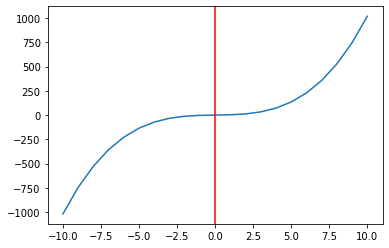

In [0]:
x = np.arange(-10, 11)
y = x**3 + 2 * x
plt.plot(x,y)
plt.axvline(x=0, color='red')
plt.show()

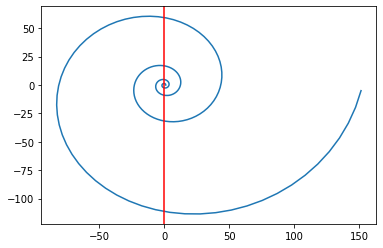

In [0]:
theta = np.arange(0, 8 * np.pi, 0.1)
x = np.cos(theta) * np.exp(0.2 * theta)
y = np.sin(theta) * np.exp(0.2 * theta)
plt.plot(x, y)
plt.axvline(x=0, color='red')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

> Because they give more than one output for the same input. This means they might be non-deterministic and can be very difficult to work with in Data Science. 

## Non-determinism won't always fail this test though!

In [0]:
from Fortuna import quantum_monty

Fortuna.quantum_monty is a random number generator that produces variates based on the combination of several distributions.

`quantum_monty(N) -> [0, N-1]`

The output distribution reminds me of the quantum wave function in Physics, hence the name.

The exact nature of quantum_monty is besides the point. Any random function fails to be a pure math function because it is, by definition, non-deterministic... software seeding not-with-standing. However, they pass the red-line test.

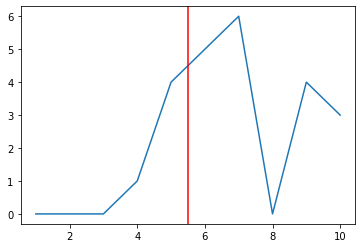

In [0]:
x = np.arange(1, 11)
y = list(map(quantum_monty, x))
plt.plot(x, y)
plt.axvline(x=np.mean(x), color='red')
plt.show()

# Functions as Relations

> I firmly believe that we should never overload the vocabulary of our field. If we want to talk about a special type of function - then we need special terminology to disambiguate what we're talking about. Mathematical Function? Domain Mapping Function? Proper Function is not good enough. It makes it sound like other types of functions are not good. And it's true they aren't good for PCA... But in general this doesn't hold. Please don't redefine "Function", it's going to cause your students (who don't know programming very well) to go totally crazy!

**The word "Function" as input to the student needs to have one and only one output - RIGHT? The irony is painful.**

## 2.1 Which of the following relations are mathematical functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

> Relation 2 is the only relation that is potentially a true mathematical function. The reason I say 'potentially' is that we can only see three input/output pairs for each. It is unclear what output other inputs will produce. Yes, I'm splitting hairs, that is my nature. To wit, what about relations that are undefined for more than one input? Can they be functions under this definition? If so, none of the above are functions.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

> M has 3 dimensions of input. And 3 dimensions of output.

> N has 4 dimensions of input. And 2 dimentions of output.

### Signatures:

`M(x, y, z) -> Tuple<3>`

`N(a, b, c, d) -> Tuple<2>`

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

### Monad

> Yes. I'm sure it's possible - even though I'm also quite sure that the expected answer is NO. However, Monads do this to carry extra information in the return value to support side-effects in a functional manner. They return the parent object not just the answer computed. This can easily be higher dimensional than the input space.

### Complex

In [0]:
def make_complex(N: int) -> complex:
    return N / 2 + N * 1j

In [0]:
make_complex(10)

(5+10j)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
import numpy as np

In [0]:
def p(vec):
    x, y = vec
    return np.array((
        (x + 3 * y), 
        (2 * y - x),
    ))

In [0]:
def q(vec):
    x, y, z = vec
    return np.array((
        (4 * x + y + 2 * z),
        (2 * y - x + 3 * z),
        (5 * x - 2 * z + y),
    ))

In [0]:
i_hat = np.array([[1],[0]])
j_hat = np.array([[0],[1]])
print("2d transforms with p\n")
print("i hat\n", p(i_hat), '\n')
print("j hat\n", p(j_hat))

2d transforms with p

i hat
 [[ 1]
 [-1]] 

j hat
 [[3]
 [2]]


In [0]:
T = np.array((
    (1, 3),
    (-1, 2)
))
np.matmul(T, np.column_stack([i_hat, j_hat]))

array([[ 1,  3],
       [-1,  2]])

In [0]:
np.column_stack([p(i_hat), p(j_hat)])

array([[ 1,  3],
       [-1,  2]])

In [0]:
print("3d transforms with q\n")
i_hat = np.array([[1],[0], [0]])
j_hat = np.array([[0],[1], [0]])
k_hat = np.array([[0],[0], [1]])

print("i hat\n", q(i_hat), '\n')
print("j hat\n", q(j_hat), '\n')
print("k hat\n", q(k_hat))

3d transforms with q

i hat
 [[ 4]
 [-1]
 [ 5]] 

j hat
 [[1]
 [2]
 [1]] 

k hat
 [[ 2]
 [ 3]
 [-2]]


In [0]:
T = np.array((
    (4, 1, 2),
    (-1, 2, 3),
    (5, 1, -2)
))
np.matmul(T, np.column_stack([i_hat, j_hat, k_hat]))

array([[ 4,  1,  2],
       [-1,  2,  3],
       [ 5,  1, -2]])

In [0]:
np.column_stack([q(i_hat), q(j_hat), q(k_hat)])

array([[ 4,  1,  2],
       [-1,  2,  3],
       [ 5,  1, -2]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

> The can be used to decompose any square matrix by diagonalizing it. This will summarize the matrix. This is good for reducing the computational complexity of machine learning with the transformed matrix.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

> More columns means more computation. Also having more columns compared to the number of rows can be problematic due to the math involved. You also run the risk of over fitting if the number of columns exceeds the number of rows.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

> Some say the number of rows should be n^2 others want n^3 where n is the number of columns.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [0]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [0]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [0]:
# check for null values
national.isnull().sum().any()

False

In [0]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [0]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [0]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [0]:
# Now we only ahve numeric columns (ints and floats)

### Scatterplot of PC1 against PC2

In [0]:
### Your Code Here
national_processed.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

1. Separate X and Y
2. Center at zero by subtracting the mean
3. Divide by the standard deviation
4. Calculate the Variance-Covariance Matrix
5. Calculate the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix
6. Sort the pairs
7. Use a matrix transformation to project the datapoints onto our eigenvector subspaces

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
# Normalize
feature_cols = national_processed.columns[1:]
x = national_processed.loc[:, feature_cols].values
x = StandardScaler().fit_transform(x)
print(f"{np.mean(x):.2f}")
print(f"{np.std(x):.2f}")

0.00
0.99


In [0]:
norm_features = pd.DataFrame(x, columns=feature_cols)
norm_features.sample(5)

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
59241,-0.129822,-0.178959,1.528983,0.211320,1.627959,1.313933,1.313896,1.482767,1.140132,0.310570,1.086017,-0.271749,-0.142292,-0.570378,-0.268140,1.097899,-0.235435,-0.331426,-1.325928,0.823743,-0.166587,-0.001189,0.165318,0.053755,1.164576,-0.454023,-0.466394,-0.180388,-0.327334,-0.241720,-0.123746,0.063097,1.448319,0.211320,1.313933,1.313896,1.482767,0.844818,0.754515,0.755066,...,0.448213,-0.548393,-0.588115,-0.384585,-0.683751,-0.429972,0.432580,-0.583947,-0.685212,-0.187815,-0.390280,-0.326595,0.472927,-0.491171,-0.452728,-0.001189,-0.706647,1.097920,0.05361,0.388888,1.164576,0.676610,0.649838,0.615731,0.703541,0.778350,-0.518776,-0.588115,-0.685212,-0.452728,-0.082759,-0.465954,-0.552811,-0.683751,-0.390280,0.001282,2.256944,-0.544709,2.164001,0.0
18389,1.969071,0.608784,1.528983,-0.035061,-0.579512,0.589633,0.586877,0.682055,0.285795,-1.517969,0.515773,-0.271749,-0.142292,2.642164,-0.268140,-0.518234,-0.253701,-0.856494,0.633647,0.434080,0.621172,-0.001189,0.375037,-0.626460,-0.858681,2.634279,0.907919,2.701963,2.717840,2.713772,2.684671,0.726611,-0.774303,-0.035061,0.589633,0.586877,0.682055,0.359317,-0.830871,-0.831835,...,0.448213,4.796569,0.796007,4.654555,1.138032,2.377662,0.432580,4.814172,0.716067,4.567917,1.634783,2.307475,0.472927,4.684459,0.923669,-0.001189,-0.706647,0.467274,-0.62717,-1.613416,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,0.926091,1.497727,1.348523,1.138032,1.634783,1.171883,-0.709278,-0.544709,2.164001,0.0
54446,0.351174,0.608784,-0.375587,-0.317494,-0.412049,-0.540608,-0.541522,-0.509426,-0.074057,0.310570,1.086017,-0.271749,-0.142292,0.152463,-0.268140,-0.518234,-0.253701,-0.331426,0.047226,0.044416,-0.354572,-0.001189,-0.627746,-0.626460,-0.858681,-0.295255,0.163500,-0.055611,0.020652,-0.024069,-0.084386,-0.152931,-0.774303,-0.317494,-0.540608,-0.541522,-0.509426,-0.113680,-0.208725,-0.210186,...,0.448213,0.212074,0.796007,0.085601,1.138032,0.107374,0.432580,0.275654,0.716067,-0.050983,0.115986,0.019041,0.472927,0.123977,0.923669,-0.001189,-0.706647,1.097920,-0.62717,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,-0.082759,0.515887,0.397856,1.138032,0.115986,0.001282,-0.709278,-0.544709,-0.462107,0.0
25861,-2.491077,2.184270,0.576698,-1.445932,-1.251903,-1.508743,-1.508046,-1.586064,-2.215163,-0.603700,1.314115,3.679872,-0.142292,-0.570378,3.197696,-2.134368,-0.235435,-0.856494,-0.223177,-3.072895,-0.824704,-2.398410,-1.086888,0.053755,1.164576,-0.546211,-0.405123,-0.466355,-0.511432,-0.485963,-0.447267,-0.693140,-0.774303,-1.445932,-1.508743,-1.508046,-1.586064,-2.653790,-1.415984,-1.415532,...,-3.505595,-0.207863,0.796007,-0.388857,-0.228305,-0.755448,-3.513093,-0.325948,0.716067,-0.195192,0.115986,-0.889126,-3.494520,-0.047685,0.923669,-2.398410,-0.706647,1.728565,0.05361,-0.612264,1.164576,-2.353578,-2.391078,-2.438784,-2.320150,-2.049643,0.859820,0.796007,0.716067,0.923669,-2.100459,0.024966,-0.077478,-0.228305,0.115986,-1.559520,-0.709278,-1.638890,-0.462107,0.0
33850,0.482355,2.184270,-0.375587,-0.849865,-

In [0]:
# Variance-Covariance Matrix
cov_matrix = np.cov(norm_features.T)

In [0]:
# PCA
pca = PCA(2)
pca_data = pca.fit_transform(x)

In [0]:
print(pca_data.shape)

(64535, 2)


In [0]:
df_pca = pd.DataFrame(data=pca_data, columns=['component 1','component 2'])

In [0]:
pca.explained_variance_ratio_

array([0.34391213, 0.14590979])

In [0]:
print(f"{sum(pca.explained_variance_ratio_):.2f}")

0.49


- PCA 2 explains 49%

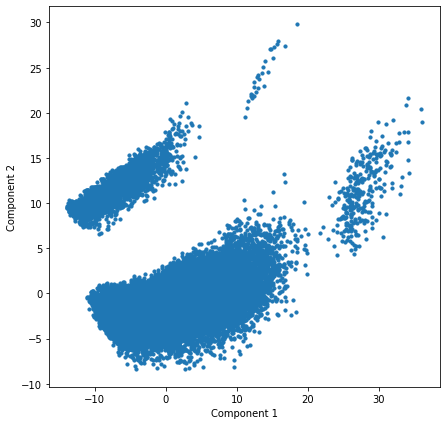

In [0]:
plt.figure(figsize=(7, 7))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    x=df_pca['component 1'],
    y=df_pca['component 2'],
    s=10,
)
plt.show()

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

> There is no original scatter plot! No resemblance.

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

- PCA 14 gives nearly 90%
- PCA 15 gives 91% 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)

## Stretch Goal #2 Code

How many principal conponents do you need to retain in order for your PCA to contain 90% of the explained variance?

In [0]:
# Better than Scree Plot...
for i in range(1, 25):
    pca_n = PCA(i)
    pca_n_data = pca_n.fit_transform(x)
    result = sum(pca_n.explained_variance_ratio_)
    if result < 0.90:
        continue
    else:
        print(f"PCA {i}: {result:.2f}")
        break

PCA 15: 0.91


- PCA 14 gets very close to 90%
- PCA 15 explains 91%